In [1]:
import numpy as np
import pandas as pd
from FORCE.learning import Regression
from FORCE.utility import plot_learning_forecast

In [2]:
fp = "2021_OWMR.csv"
projects = pd.read_csv(fp, header=2)#, encoding="ISO-8859-1")

In [55]:
filters = {
   'Capacity MW (Max)': (149, ),
   'Full Commissioning': (2014, 2021),
   'CAPEX_per_kw': (800, 8000.0)
}

to_aggregate = {
    'United Kingdom': 'United Kingdom',
    'Germany': 'Germany',
    'Netherlands': 'Netherlands',
    'Belgium' : 'Belgium',
    'China': 'China',
}

regression = Regression(
    projects,
    y_var="log CAPEX_per_kw",
    filters=filters,
    regression_variables=['Country Name', 'Water Depth Max (m)', 'Turbine MW (Max)',  'Capacity MW (Max)', 'Distance From Shore Auto (km)'],
    aggregate_countries=to_aggregate,
    drop_categorical=["United Kingdom"],
#     drop_country=["China"],
    log_vars=['Cumulative Capacity', 'CAPEX_per_kw']
)

In [57]:
# Display learning rate
lr = np.round(regression.learning_rate, 3) * 100
print('Learning rate (%):', lr)
print(regression.summary, regression.vif)

Learning rate (%): 7.3
                            OLS Regression Results                            
Dep. Variable:       log CAPEX_per_kw   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     24.15
Date:                Fri, 06 Aug 2021   Prob (F-statistic):           6.91e-15
Time:                        15:07:47   Log-Likelihood:                 33.331
No. Observations:                  56   AIC:                            -44.66
Df Residuals:                      45   BIC:                            -22.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [58]:
# Old source from various consultancies
forecast_old = {
#     2013: 4453,
#     2014: 7002,
#     2015: 7818,
#     2016: 12155,
#     2017: 12678,
#     2018: 16940,
    2019: 22592,
    2020: 33470,
    2021: 40366,
    2022: 43769,
    2023: 52924,
    2024: 63195,
    2025: 66675,
    2026: 83875,
    2027: 84875,
    2028: 90875,
    2031: 91325
}

In [59]:
# Global announced cumulative capacity (per OWMR: 2021 edition)
forecast = {
#     2013: 6757,
#     2014: 7856,
#     2015: 11813,
#     2016: 13119,
#     2017: 16567,
#     2018: 21078,
#     2019: 27387,
#     2020: 32906,
    2021: 51364,
    2022: 67032,
    2023: 77298,
    2024: 92674,
    2025: 115594,
    2026: 145460,
    2027: 167387,
    2028: 190860,
    2029: 201420,
    2030: 228978,
    2031: 240348,
    2032: 252645,
    2033: 260575,
    2034: 269220,
    2035: 276972
}

2020 capex


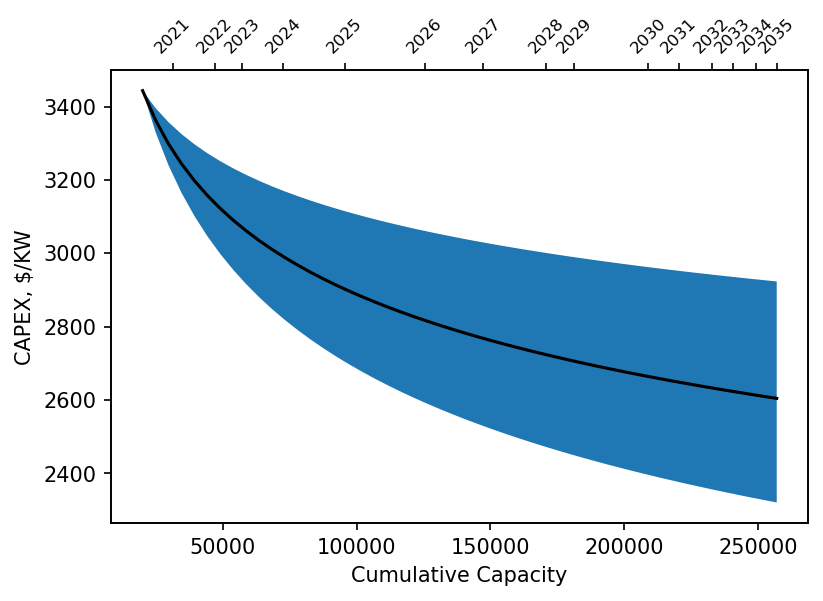

In [60]:
axes = plot_learning_forecast(
    installed=regression.installed_capacity,
    capex=regression.current_capex,
    fit=regression.cumulative_capacity_fit,
    forecast=forecast,
    bse=regression.cumulative_capacity_bse,
    perc_change=False,
    figsize=(6, 4),
    dpi=150
)